# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [ ]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [ ]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100%|██████████| 9.91M/9.91M [00:00<00:00, 42.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.13MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 679kB/s]


Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [ ]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [ ]:
model = torch.nn.Linear(28*28, 10)

In [ ]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.0361, -0.0151,  0.2142,  0.1245, -1.0769,  0.6629, -0.1253,  0.3766,
          0.4375, -0.0823]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [ ]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [ ]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        print(f'Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}')

Época: 1/5, batch: 1/600
Época: 1/5, batch: 2/600
Época: 1/5, batch: 3/600
Época: 1/5, batch: 4/600
Época: 1/5, batch: 5/600
Época: 1/5, batch: 6/600
Época: 1/5, batch: 7/600
Época: 1/5, batch: 8/600
Época: 1/5, batch: 9/600
Época: 1/5, batch: 10/600
Época: 1/5, batch: 11/600
Época: 1/5, batch: 12/600
Época: 1/5, batch: 13/600
Época: 1/5, batch: 14/600
Época: 1/5, batch: 15/600
Época: 1/5, batch: 16/600
Época: 1/5, batch: 17/600
Época: 1/5, batch: 18/600
Época: 1/5, batch: 19/600
Época: 1/5, batch: 20/600
Época: 1/5, batch: 21/600
Época: 1/5, batch: 22/600
Época: 1/5, batch: 23/600
Época: 1/5, batch: 24/600
Época: 1/5, batch: 25/600
Época: 1/5, batch: 26/600
Época: 1/5, batch: 27/600
Época: 1/5, batch: 28/600
Época: 1/5, batch: 29/600
Época: 1/5, batch: 30/600
Época: 1/5, batch: 31/600
Época: 1/5, batch: 32/600
Época: 1/5, batch: 33/600
Época: 1/5, batch: 34/600
Época: 1/5, batch: 35/600
Época: 1/5, batch: 36/600
Época: 1/5, batch: 37/600
Época: 1/5, batch: 38/600
Época: 1/5, batch: 39

In [ ]:
print('Final loss:', loss.data)

Final loss: tensor(0.2841)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

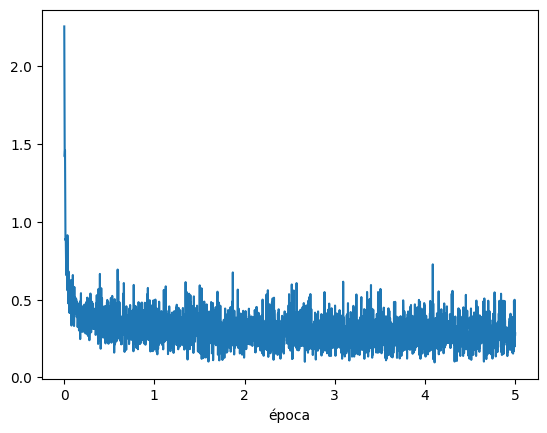

In [ ]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

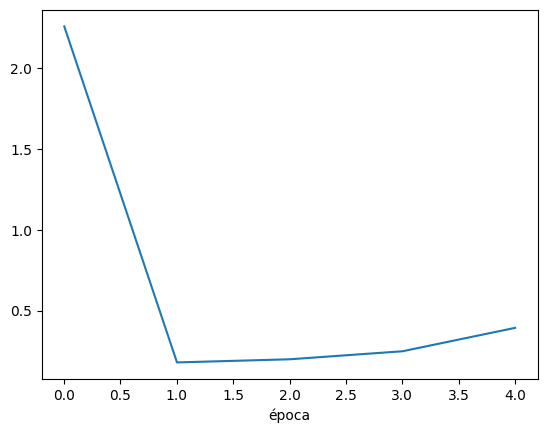

In [ ]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch? R.: O mini-batch tem tamanho batch_size = 100
2. Em uma época, quantos mini-batches existem? R.: 60000/100=600 mini-batches
3. Qual é a definição de época? R.: Uma época é uma passagem completa por todos mini-batches do dataset de treino, fazendo 4 atividade: predict, cálculo da perda, backpropagation e atualização dos pesos.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [ ]:
batch_size = 10
n_epochs = 5
learningRate = 0.5
results = {}

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)
model = torch.nn.Linear(28*28, 10)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
epochs, losses = [], []
total_trained_samples = 0

for i in range(n_epochs):
      for k,(x_train, y_train) in enumerate(loader_train):
          # Transforma a entrada para uma dimensão
          inputs = Variable(x_train.view(-1, 28 * 28))
          # predict da rede
          outputs = model(inputs)

          # calcula a perda
          loss = criterion(outputs, Variable(y_train))

          # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          total_trained_samples += x_train.size(0)
          epochs.append(total_trained_samples / total_samples)
          losses.append(loss.data)
          print(f'Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}')

/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


A saída de streaming foi truncada nas últimas 5000 linhas.
Época: 5/5, batch: 1001/6000
Época: 5/5, batch: 1002/6000
Época: 5/5, batch: 1003/6000
Época: 5/5, batch: 1004/6000
Época: 5/5, batch: 1005/6000
Época: 5/5, batch: 1006/6000
Época: 5/5, batch: 1007/6000
Época: 5/5, batch: 1008/6000
Época: 5/5, batch: 1009/6000
Época: 5/5, batch: 1010/6000
Época: 5/5, batch: 1011/6000
Época: 5/5, batch: 1012/6000
Época: 5/5, batch: 1013/6000
Época: 5/5, batch: 1014/6000
Época: 5/5, batch: 1015/6000
Época: 5/5, batch: 1016/6000
Época: 5/5, batch: 1017/6000
Época: 5/5, batch: 1018/6000
Época: 5/5, batch: 1019/6000
Época: 5/5, batch: 1020/6000
Época: 5/5, batch: 1021/6000
Época: 5/5, batch: 1022/6000
Época: 5/5, batch: 1023/6000
Época: 5/5, batch: 1024/6000
Época: 5/5, batch: 1025/6000
Época: 5/5, batch: 1026/6000
Época: 5/5, batch: 1027/6000
Época: 5/5, batch: 1028/6000
Época: 5/5, batch: 1029/6000
Época: 5/5, batch: 1030/6000
Época: 5/5, batch: 1031/6000
Época: 5/5, batch: 1032/6000
Época: 5/5, b

Text(0.5, 0, 'época')

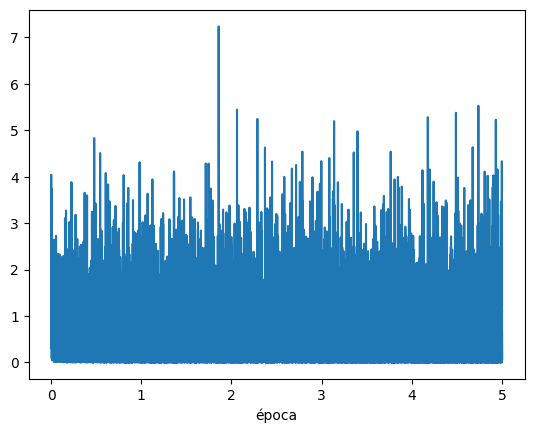

In [ ]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

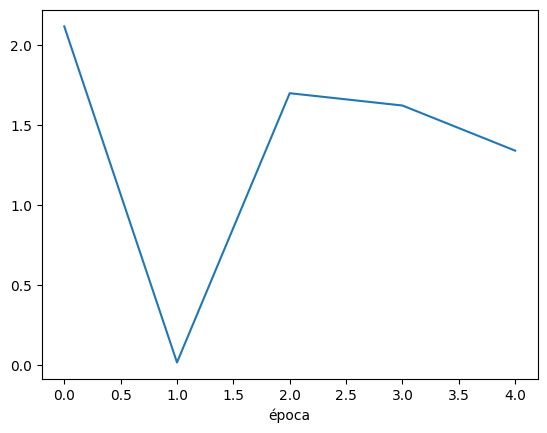

In [ ]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

In [ ]:
batch_size = 250
n_epochs = 5
learningRate = 0.5
results = {}

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)
model = torch.nn.Linear(28*28, 10)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
epochs, losses = [], []
total_trained_samples = 0

for i in range(n_epochs):
      for k,(x_train, y_train) in enumerate(loader_train):
          # Transforma a entrada para uma dimensão
          inputs = Variable(x_train.view(-1, 28 * 28))
          # predict da rede
          outputs = model(inputs)

          # calcula a perda
          loss = criterion(outputs, Variable(y_train))

          # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          total_trained_samples += x_train.size(0)
          epochs.append(total_trained_samples / total_samples)
          losses.append(loss.data)
          print(f'Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}')

Época: 1/5, batch: 1/240
Época: 1/5, batch: 2/240
Época: 1/5, batch: 3/240
Época: 1/5, batch: 4/240
Época: 1/5, batch: 5/240
Época: 1/5, batch: 6/240
Época: 1/5, batch: 7/240
Época: 1/5, batch: 8/240
Época: 1/5, batch: 9/240
Época: 1/5, batch: 10/240
Época: 1/5, batch: 11/240
Época: 1/5, batch: 12/240
Época: 1/5, batch: 13/240
Época: 1/5, batch: 14/240
Época: 1/5, batch: 15/240
Época: 1/5, batch: 16/240
Época: 1/5, batch: 17/240
Época: 1/5, batch: 18/240
Época: 1/5, batch: 19/240
Época: 1/5, batch: 20/240
Época: 1/5, batch: 21/240
Época: 1/5, batch: 22/240
Época: 1/5, batch: 23/240
Época: 1/5, batch: 24/240
Época: 1/5, batch: 25/240
Época: 1/5, batch: 26/240
Época: 1/5, batch: 27/240
Época: 1/5, batch: 28/240
Época: 1/5, batch: 29/240
Época: 1/5, batch: 30/240
Época: 1/5, batch: 31/240
Época: 1/5, batch: 32/240
Época: 1/5, batch: 33/240
Época: 1/5, batch: 34/240
Época: 1/5, batch: 35/240
Época: 1/5, batch: 36/240
Época: 1/5, batch: 37/240
Época: 1/5, batch: 38/240
Época: 1/5, batch: 39

Text(0.5, 0, 'época')

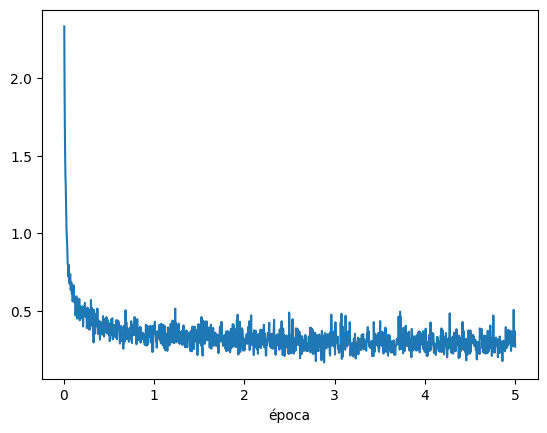

In [ ]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

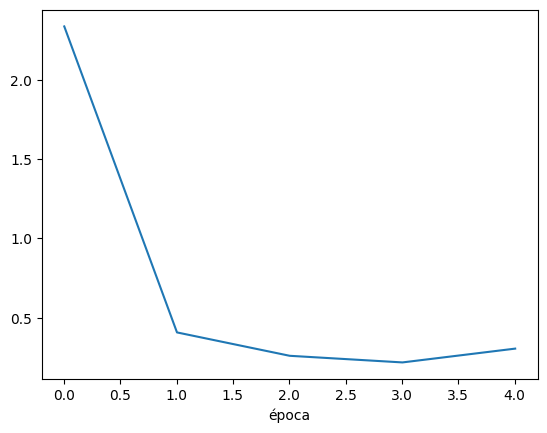

In [ ]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

In [ ]:
batch_size = 1000
n_epochs = 5
learningRate = 0.5
results = {}

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)
model = torch.nn.Linear(28*28, 10)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
epochs, losses = [], []
total_trained_samples = 0

for i in range(n_epochs):
      for k,(x_train, y_train) in enumerate(loader_train):
          # Transforma a entrada para uma dimensão
          inputs = Variable(x_train.view(-1, 28 * 28))
          # predict da rede
          outputs = model(inputs)

          # calcula a perda
          loss = criterion(outputs, Variable(y_train))

          # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          total_trained_samples += x_train.size(0)
          epochs.append(total_trained_samples / total_samples)
          losses.append(loss.data)
          print(f'Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}')

Época: 1/5, batch: 1/60
Época: 1/5, batch: 2/60
Época: 1/5, batch: 3/60
Época: 1/5, batch: 4/60
Época: 1/5, batch: 5/60
Época: 1/5, batch: 6/60
Época: 1/5, batch: 7/60
Época: 1/5, batch: 8/60
Época: 1/5, batch: 9/60
Época: 1/5, batch: 10/60
Época: 1/5, batch: 11/60
Época: 1/5, batch: 12/60
Época: 1/5, batch: 13/60
Época: 1/5, batch: 14/60
Época: 1/5, batch: 15/60
Época: 1/5, batch: 16/60
Época: 1/5, batch: 17/60
Época: 1/5, batch: 18/60
Época: 1/5, batch: 19/60
Época: 1/5, batch: 20/60
Época: 1/5, batch: 21/60
Época: 1/5, batch: 22/60
Época: 1/5, batch: 23/60
Época: 1/5, batch: 24/60
Época: 1/5, batch: 25/60
Época: 1/5, batch: 26/60
Época: 1/5, batch: 27/60
Época: 1/5, batch: 28/60
Época: 1/5, batch: 29/60
Época: 1/5, batch: 30/60
Época: 1/5, batch: 31/60
Época: 1/5, batch: 32/60
Época: 1/5, batch: 33/60
Época: 1/5, batch: 34/60
Época: 1/5, batch: 35/60
Época: 1/5, batch: 36/60
Época: 1/5, batch: 37/60
Época: 1/5, batch: 38/60
Época: 1/5, batch: 39/60
Época: 1/5, batch: 40/60
Época: 1/

Text(0.5, 0, 'época')

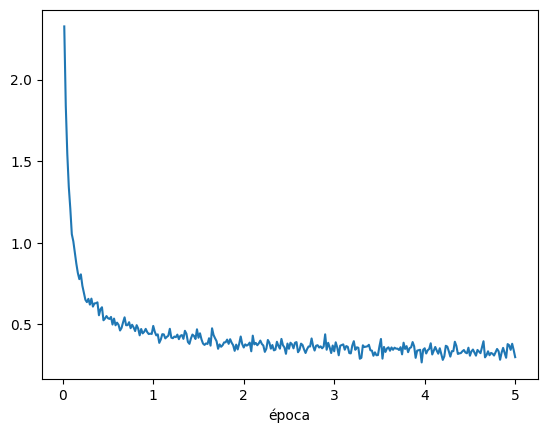

In [ ]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

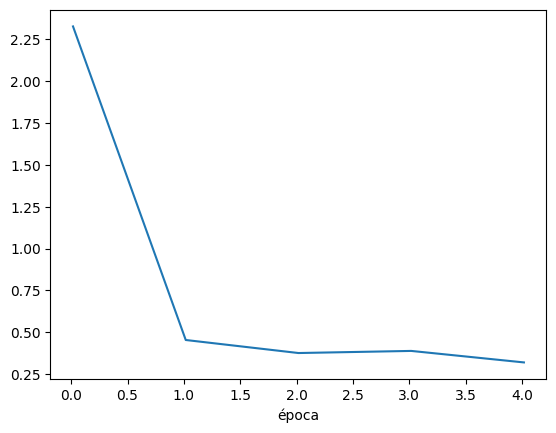

In [ ]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

Os experimentos com diferentes tamanhos de minibatch (batch_size) no MNIST revelaram um claro trade-off. Batch_size = 10 resultou em treinamento extremamente ruidoso e instável, apesar da rápida queda inicial na perda. Batch_size = 100 e 250 apresentaram um bom equilíbrio, com convergência relativamente suave e atingindo baixos níveis de perda; o batch_size = 250 mostrou a perda mais baixa ao final da 3ª época nos gráficos. Por fim, batch_size = 1000 proporcionou a convergência mais suave, mas com menos atualizações por época, o que pode ter limitado a profundidade da perda alcançada nas 5 épocas em comparação com batches intermediários.

## Conclusões sobre os experimentos deste notebook
